In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
import pickle
from sklearn.model_selection import train_test_split
import os

In [2]:
#uploading all the csv files we have and convert into dataframes 

df_1990_99 = pd.read_csv("/Users/velmurugan/Downloads/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df_2000_12 = pd.read_csv("/Users/velmurugan/Downloads/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df_2012_14 = pd.read_csv("/Users/velmurugan/Downloads/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df_2015_16 = pd.read_csv("/Users/velmurugan/Downloads/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df_2017_onwards = pd.read_csv("/Users/velmurugan/Downloads/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [3]:
#concatinating all the dataframes in order to get the single dataframe
data_frame = pd.concat([df_1990_99,df_2000_12,df_2012_14,df_2015_16,df_2017_onwards])

In [4]:
#expanding single column into two columns and convert the dtype str--> int64
data_frame[["storey_range_start","storey_range_end"]] = data_frame["storey_range"].str.split(" TO ",expand=True)
data_frame.drop("storey_range",axis=1,inplace=True)
data_frame['storey_range_start']=pd.to_numeric(data_frame['storey_range_start'])
data_frame['storey_range_end']=pd.to_numeric(data_frame['storey_range_end'])

In [5]:
data_frame[['resale_year','resale_month']] = data_frame["month"].str.split("-",expand=True)
data_frame.drop("month",axis=1,inplace=True)

In [6]:
data_frame['resale_year']=pd.to_numeric(data_frame['resale_year'])
data_frame['resale_month']=pd.to_numeric(data_frame['resale_month'])

In [7]:
data_frame.columns

Index(['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'storey_range_start', 'storey_range_end', 'resale_year',
       'resale_month'],
      dtype='object')

In [8]:
data_frame.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [9]:
data_frame.flat_type = data_frame['flat_type'].str.replace("MULTI-GENERATION","MULTI GENERATION")

In [10]:
data_frame.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [11]:
data_frame.flat_model.unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [12]:
flat_model=['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen']
flat_model = sorted(flat_model)
flat_model

['2-ROOM',
 '2-room',
 '3Gen',
 'APARTMENT',
 'Adjoined flat',
 'Apartment',
 'DBSS',
 'IMPROVED',
 'IMPROVED-MAISONETTE',
 'Improved',
 'Improved-Maisonette',
 'MAISONETTE',
 'MODEL A',
 'MODEL A-MAISONETTE',
 'MULTI GENERATION',
 'Maisonette',
 'Model A',
 'Model A-Maisonette',
 'Model A2',
 'Multi Generation',
 'NEW GENERATION',
 'New Generation',
 'PREMIUM APARTMENT',
 'Premium Apartment',
 'Premium Apartment Loft',
 'Premium Maisonette',
 'SIMPLIFIED',
 'STANDARD',
 'Simplified',
 'Standard',
 'TERRACE',
 'Terrace',
 'Type S1',
 'Type S2']

In [13]:
data_frame.flat_model=data_frame['flat_model'].replace({'2-ROOM':'2-room','APARTMENT':'Apartment','IMPROVED':'Improved','IMPROVED-MAISONETTE':'Improved-Maisonette',
                                                        'MAISONETTE':'Maisonette','MODEL A': 'Model A','MODEL A-MAISONETTE':'Model A-Maisonette',
                                                         'MULTI GENERATION':'Multi Generation','NEW GENERATION':'New Generation',
                                                         'PREMIUM APARTMENT':'Premium Apartment','SIMPLIFIED':'Simplified','TERRACE':'Terrace'})

In [14]:
data_frame.flat_model.unique()

array(['Improved', 'New Generation', 'Model A', 'STANDARD', 'Simplified',
       'Model A-Maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-room', 'Improved-Maisonette', 'Multi Generation',
       'Premium Apartment', 'Standard', 'Adjoined flat',
       'Premium Maisonette', 'Model A2', 'DBSS', 'Type S1', 'Type S2',
       'Premium Apartment Loft', '3Gen'], dtype=object)

In [15]:
data_frame.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [16]:
data_frame.remaining_lease.tail(10)

176477    59 years 10 months
176478    62 years 07 months
176479    62 years 10 months
176480              63 years
176481    90 years 07 months
176482    75 years 08 months
176483    90 years 08 months
176484    92 years 10 months
176485    67 years 03 months
176486    63 years 04 months
Name: remaining_lease, dtype: object

In [17]:
# since remaining lease column in the form of years and months(str) we convert it into years(float) --> years+(month/12)

def convert_years_str(row):
    if pd.notna(row) and isinstance(row,str):
        split_yr_month = row.split()
        year = float(split_yr_month[0])
        month = float(split_yr_month[2] if len(split_yr_month)>2 else 0)
        year = year+(month/12)
        return year
    return row 

data_frame.remaining_lease = data_frame['remaining_lease'].apply(convert_years_str)

In [18]:
data_frame.isna().sum()

town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
storey_range_start          0
storey_range_end            0
resale_year                 0
resale_month                0
dtype: int64

In [19]:
data_frame.remaining_lease.fillna(data_frame['remaining_lease'].mode()[0],inplace =True)

In [20]:
data_frame.isna().sum()

town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
storey_range_start     0
storey_range_end       0
resale_year            0
resale_month           0
dtype: int64

In [21]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922690 entries, 0 to 176486
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 922690 non-null  object 
 1   flat_type            922690 non-null  object 
 2   block                922690 non-null  object 
 3   street_name          922690 non-null  object 
 4   floor_area_sqm       922690 non-null  float64
 5   flat_model           922690 non-null  object 
 6   lease_commence_date  922690 non-null  int64  
 7   resale_price         922690 non-null  float64
 8   remaining_lease      922690 non-null  float64
 9   storey_range_start   922690 non-null  int64  
 10  storey_range_end     922690 non-null  int64  
 11  resale_year          922690 non-null  int64  
 12  resale_month         922690 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 98.6+ MB


In [22]:
data_frame['block'] = pd.to_numeric(data_frame['block'],errors='coerce')
data_frame['block'].isna().sum()

122738

In [23]:
data_frame['block'].fillna(data_frame['block'].mode()[0],inplace=True)

In [24]:
data_frame

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,storey_range_start,storey_range_end,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,9000.0,68.000000,10,12,1990,1
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,68.000000,4,6,1990,1
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,8000.0,68.000000,10,12,1990,1
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977,6000.0,68.000000,7,9,1990,1
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,New Generation,1976,47200.0,68.000000,4,6,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176482,YISHUN,5 ROOM,298.0,YISHUN ST 20,112.0,Improved,2000,585000.0,75.666667,1,3,2024,4
176483,YISHUN,5 ROOM,2.0,YISHUN ST 31,112.0,Improved,2015,673800.0,90.666667,13,15,2024,4
176484,YISHUN,5 ROOM,2.0,YISHUN ST 51,112.0,Improved,2018,725000.0,92.833333,7,9,2024,4
176485,YISHUN,EXECUTIVE,652.0,YISHUN AVE 4,181.0,Apartment,1992,1080000.0,67.250000,7,9,2024,4


In [25]:
# in UI designing we need to encode user inputs so that we are saving unencoded data. Later we can use this unencoded unique values to encode the user inputs
# If you can't understand what we are doing here don't worry you will understand while seeing the coding part of the streamlit 

file_path ="/Users/velmurugan/Desktop/velu/python_works/singapore_flat_price_prediction/processed_singapore_flat.csv"

if not os.path.exists(file_path):
    data_frame.to_csv(file_path,index=False)
    print("File saved sucessfully...!")
else:
    print("File already exists. skip saving...")

File already exists. skip saving...


In [26]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922690 entries, 0 to 176486
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 922690 non-null  object 
 1   flat_type            922690 non-null  object 
 2   block                922690 non-null  float64
 3   street_name          922690 non-null  object 
 4   floor_area_sqm       922690 non-null  float64
 5   flat_model           922690 non-null  object 
 6   lease_commence_date  922690 non-null  int64  
 7   resale_price         922690 non-null  float64
 8   remaining_lease      922690 non-null  float64
 9   storey_range_start   922690 non-null  int64  
 10  storey_range_end     922690 non-null  int64  
 11  resale_year          922690 non-null  int64  
 12  resale_month         922690 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 98.6+ MB


In [27]:
data_frame.town.unique(),data_frame.street_name.unique()

(array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
        'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
        'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
        'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
        'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
        'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
        'PUNGGOL'], dtype=object),
 array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
        'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
        'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
        'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
        'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
        'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
        'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
        'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
        'BEDOK NTH AVE 1', 'BEDOK NTH ST

In [28]:
#we can't set the town in hierarchial order so we do labelencode
label_encoder = LabelEncoder()
data_frame.town = label_encoder.fit_transform(data_frame['town'])
data_frame.street_name = label_encoder.fit_transform(data_frame['street_name'])

In [29]:
# here we can encode in hierarchial order so we use ordinal encoder
ordian_encoder = OrdinalEncoder()
data_frame.flat_model = ordian_encoder.fit_transform(data_frame[['flat_model']])
data_frame.flat_type = ordian_encoder.fit_transform(data_frame[['flat_type']])

In [30]:
data_frame.town.unique(),data_frame.street_name.unique()

(array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
        22, 23, 24, 25, 26, 15, 20,  5, 17, 18]),
 array([ 13,  16,  17,  14,  18,  20,  19,  21,  15,  45,  42,  50, 340,
         39,  47, 115, 114,  38,  49,  48,  41,  43,  36,  37,  35,  40,
        116, 437, 425,  70,  86,  84,  71,  68,  67, 200,  65,  75,  66,
        448, 487,  52, 488, 166, 490, 236, 199, 228,  90, 198,  92, 489,
        178, 292, 385, 226, 197, 241, 248, 235, 294, 335, 492, 299, 298,
        175, 382, 181, 242, 345, 424, 397, 505, 510, 380,  97, 393, 392,
         30, 438, 509, 484, 486, 143, 512, 142, 145, 144, 141, 513, 151,
        152, 149,  99, 146, 150, 139, 322, 246, 192, 176, 434,   5, 189,
        163, 366, 196,  31, 238, 191, 177, 208, 210, 205, 218, 206, 318,
        216, 212, 217, 483, 255, 260, 256, 257, 258, 259, 347, 579, 201,
        227,  61,  60,  62, 271, 268, 261, 269, 233, 441, 342, 186,  33,
        514, 504,  51, 517, 320, 285, 188, 167, 346, 291, 232, 338, 501

In [31]:
data_frame.flat_model.unique(), data_frame.flat_type.unique()

(array([ 5., 12.,  8., 16., 17.,  9.,  3.,  7., 19.,  0.,  6., 11., 13.,
        18.,  2., 15., 10.,  4., 20., 21., 14.,  1.]),
 array([0., 2., 3., 4., 1., 5., 6.]))

In [32]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 922690 entries, 0 to 176486
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 922690 non-null  int64  
 1   flat_type            922690 non-null  float64
 2   block                922690 non-null  float64
 3   street_name          922690 non-null  int64  
 4   floor_area_sqm       922690 non-null  float64
 5   flat_model           922690 non-null  float64
 6   lease_commence_date  922690 non-null  int64  
 7   resale_price         922690 non-null  float64
 8   remaining_lease      922690 non-null  float64
 9   storey_range_start   922690 non-null  int64  
 10  storey_range_end     922690 non-null  int64  
 11  resale_year          922690 non-null  int64  
 12  resale_month         922690 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 98.6 MB


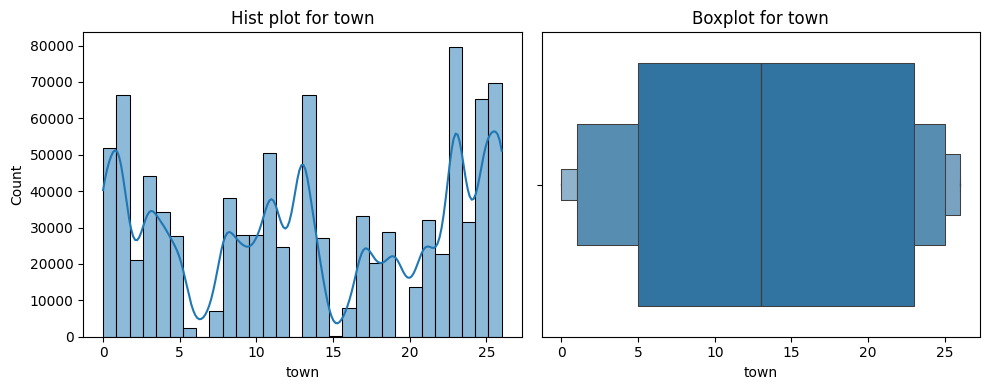

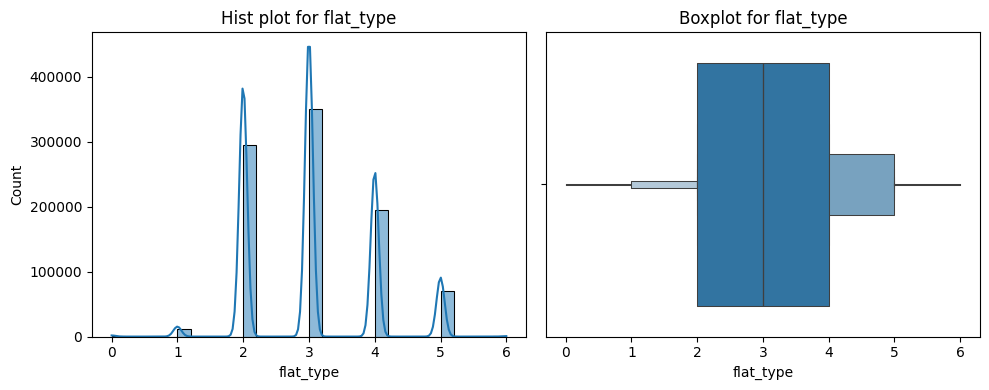

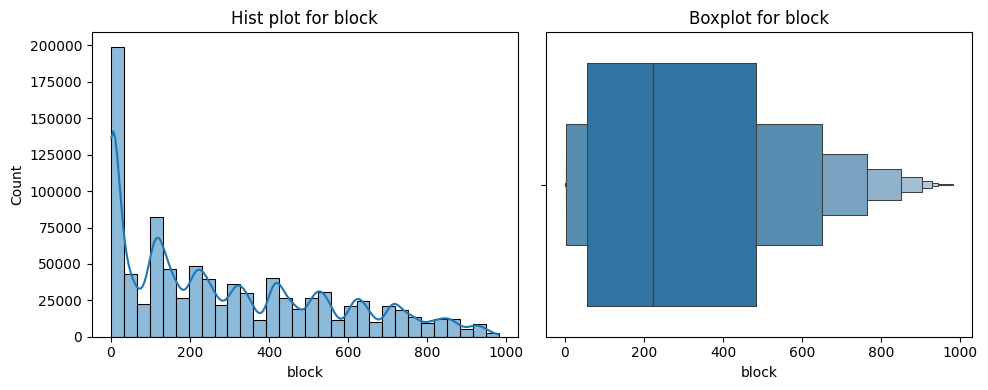

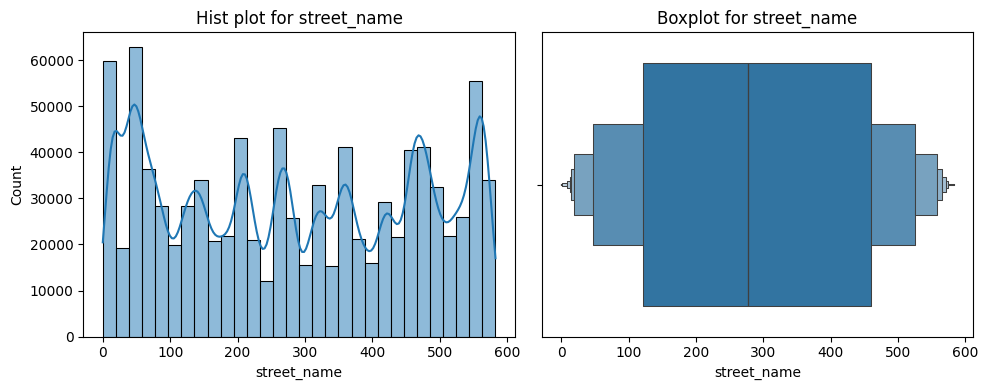

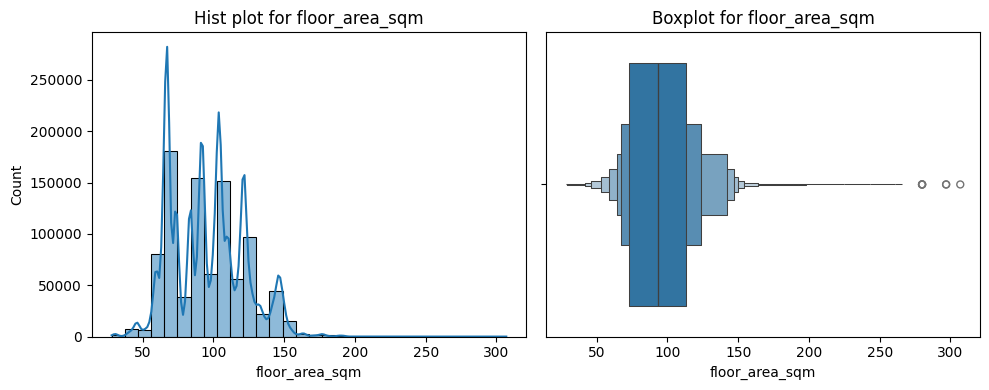

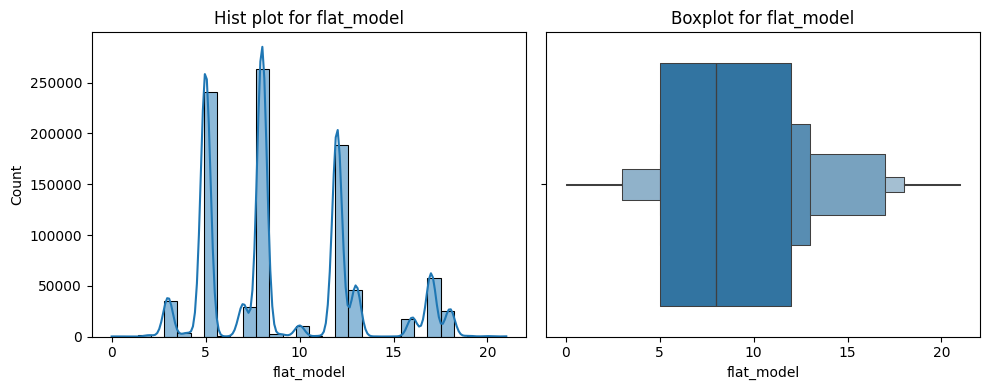

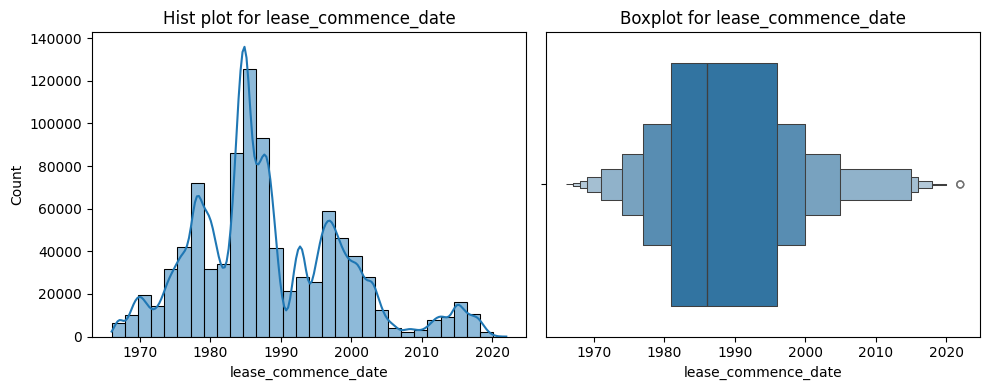

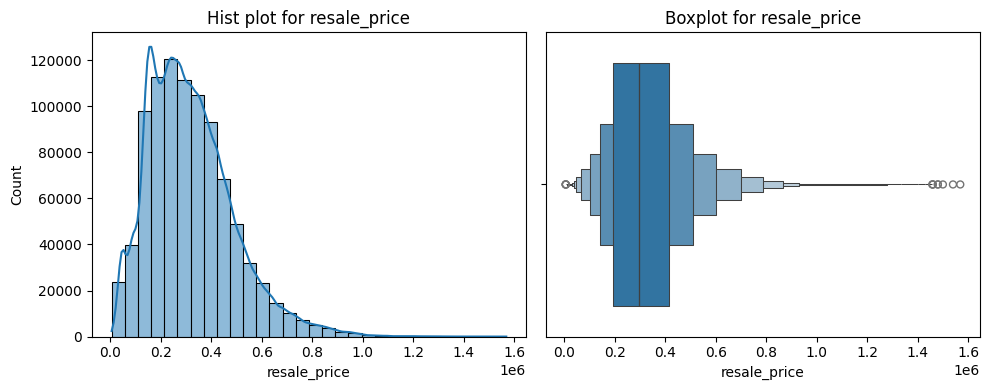

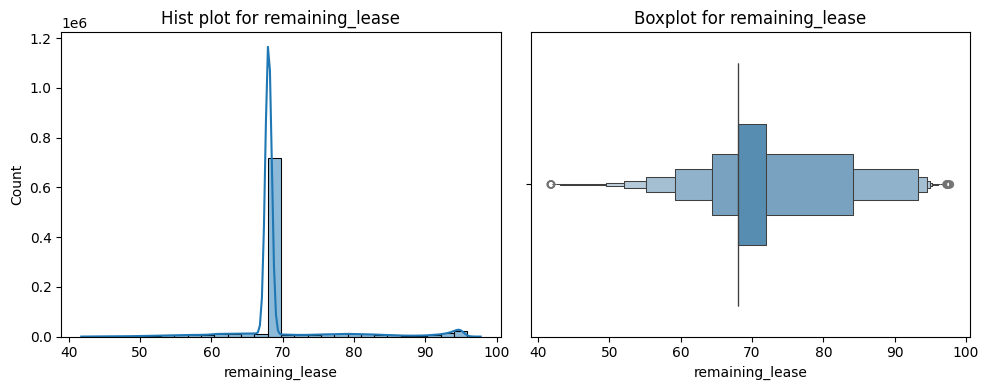

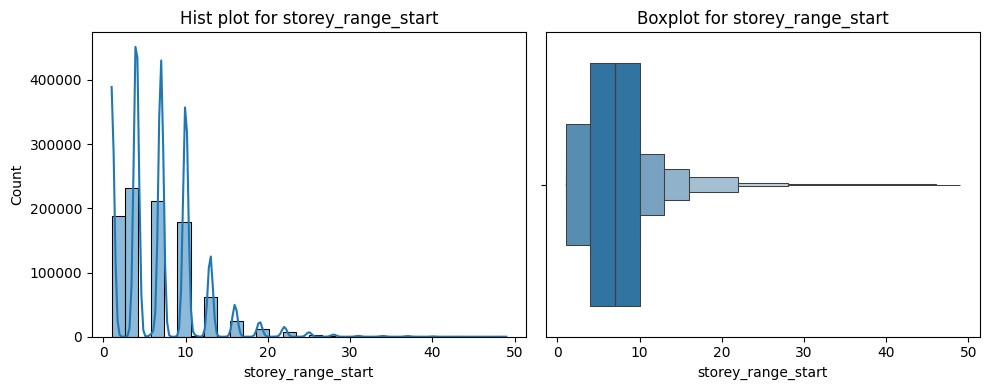

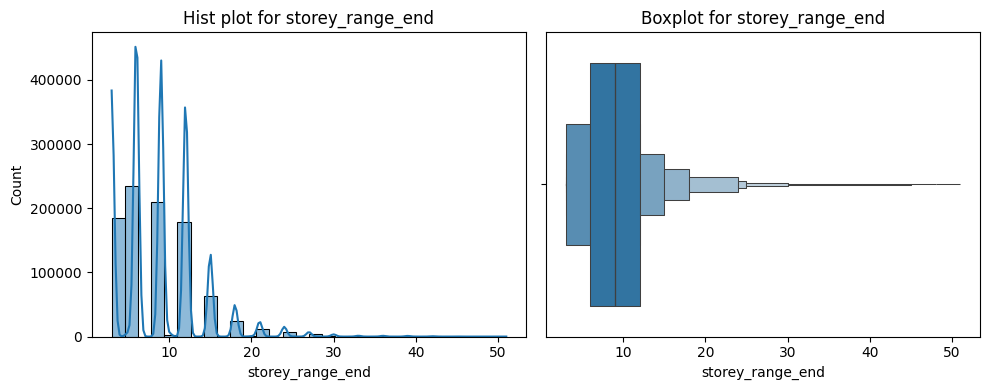

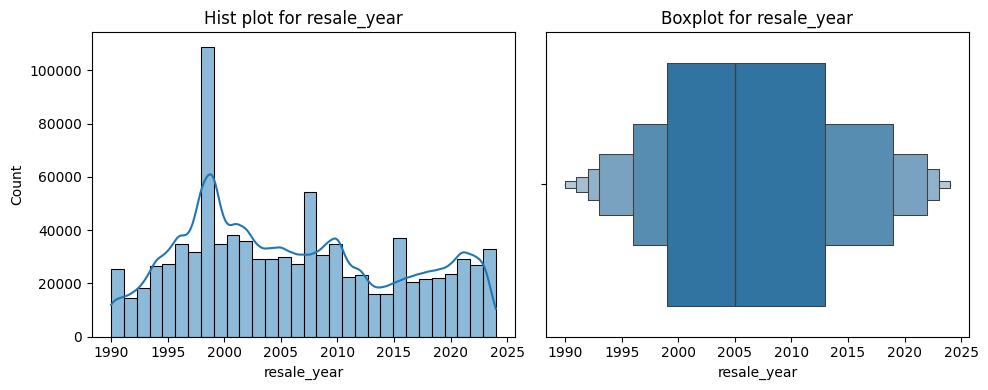

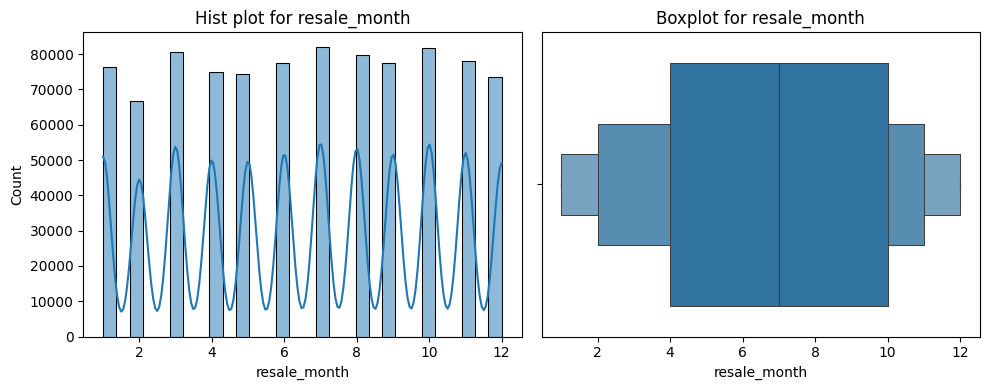

In [33]:
#check for skewness and outliers by plotting

def plot_2_graphs(df,column):
    plt.figure(figsize=(10,4))


    #plot hist
    plt.subplot(1,2,1)
    sns.histplot(df,x=column,kde=True,bins=30)
    plt.title(f"Hist plot for {column}")

    #plot boxplot
    plt.subplot(1,2,2)
    sns.boxenplot(df,x=column)
    plt.title(f"Boxplot for {column}")

    # Display the plots
    plt.tight_layout()
    plt.show()

for column_name in data_frame.columns:
    plot_2_graphs(df=data_frame,column=column_name)

In [34]:
#we have skewness in resale_price,storey_start and storey_end

def remove_skew(row):
    row = np.log(row)
    return row

skewness_in = ['resale_price','storey_range_start','storey_range_end']

for i in skewness_in:
    data_frame[i]=data_frame[i].apply(remove_skew)

In [35]:
data_frame.columns

Index(['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'storey_range_start', 'storey_range_end', 'resale_year',
       'resale_month'],
      dtype='object')

In [36]:
#taking care of outliers
outlie = ['storey_range_start','storey_range_end','floor_area_sqm']

def clip_outliers(row):
    Q1 =row.quantile(0.25)
    Q3 =row.quantile(0.75)
    IQR =Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)

    return lower_range, upper_range

for i in outlie:
    lower_range,upper_range = clip_outliers(data_frame[i])
    data_frame[i]= data_frame[i].clip(lower_range,upper_range)

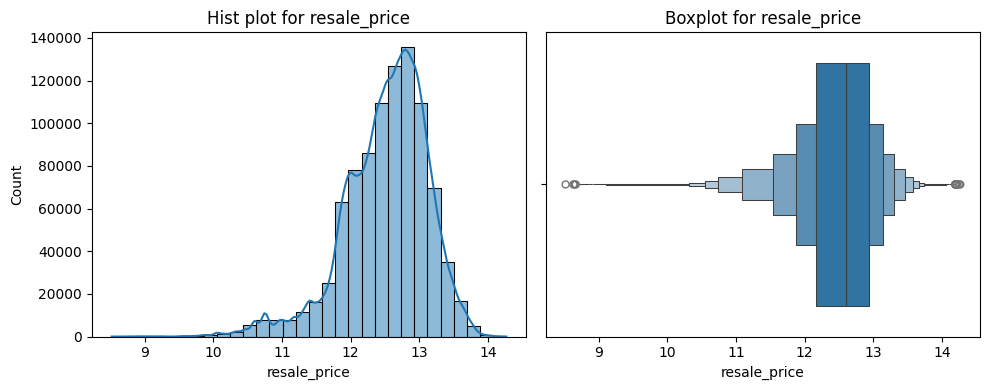

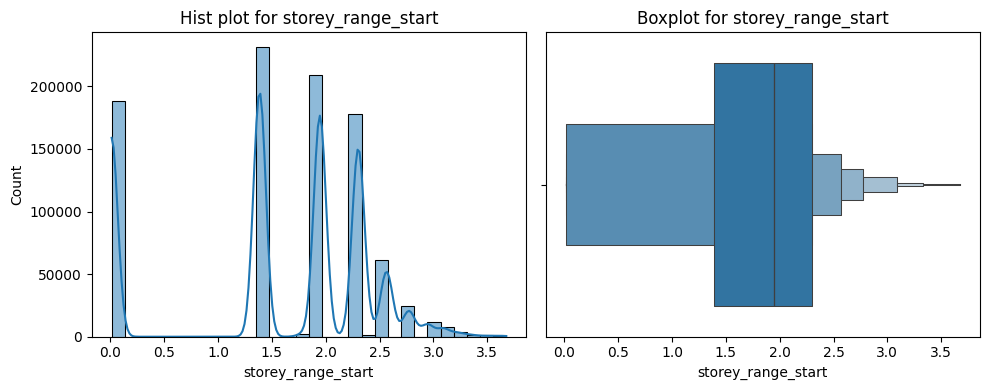

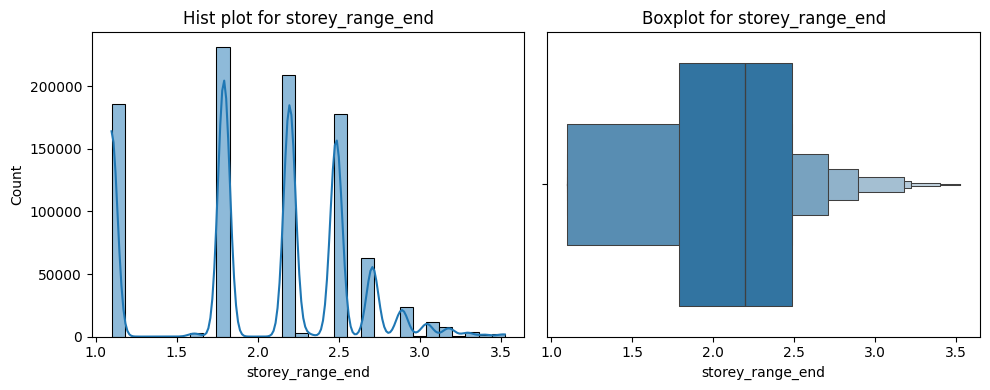

In [37]:
for i in skewness_in:
    plot_2_graphs(data_frame,i)



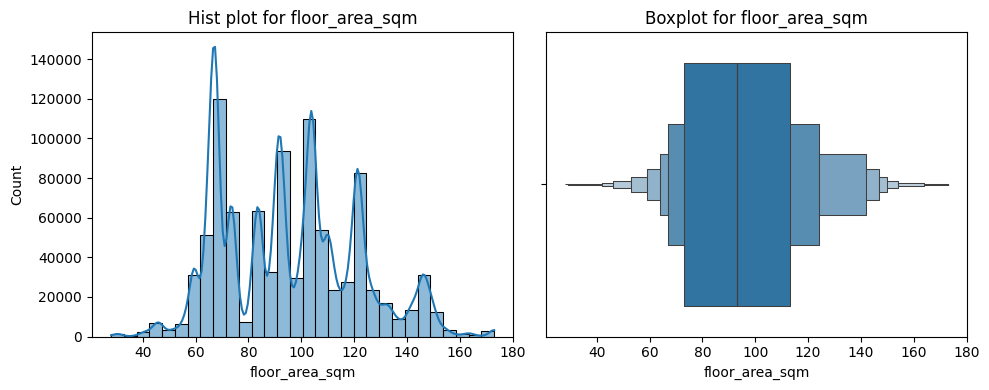

In [38]:
plot_2_graphs(data_frame,"floor_area_sqm")

In [39]:
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
town,922690.0,13.650393,8.797368,0.000000,5.000000,13.000000,23.000000,26.000000
flat_type,922690.0,3.013736,0.948488,0.000000,2.000000,3.000000,4.000000,6.000000
block,922690.0,293.100373,262.582596,1.000000,57.000000,224.000000,484.000000,980.000000
street_name,922690.0,285.951930,181.618079,0.000000,122.000000,278.000000,460.000000,583.000000
floor_area_sqm,922690.0,95.666023,25.735061,28.000000,73.000000,93.000000,113.000000,173.000000
flat_model,922690.0,9.064232,4.007746,0.000000,5.000000,8.000000,12.000000,21.000000
lease_commence_date,922690.0,1988.228724,10.614079,1966.000000,1981.000000,1986.000000,1996.000000,2022.000000
resale_price,922690.0,12.515323,0.610727,8.517193,12.170445,12.594731,12.936034,14.265878
remaining_lease,922690.0,69.509439,7.027835,41.750000,68.000000,68.000000,68.000000,97.750000
storey_range_start,922690.0,1.575194,0.900544,0.011858,1.386294,1.945910,2.302585,3.677021


<Axes: >

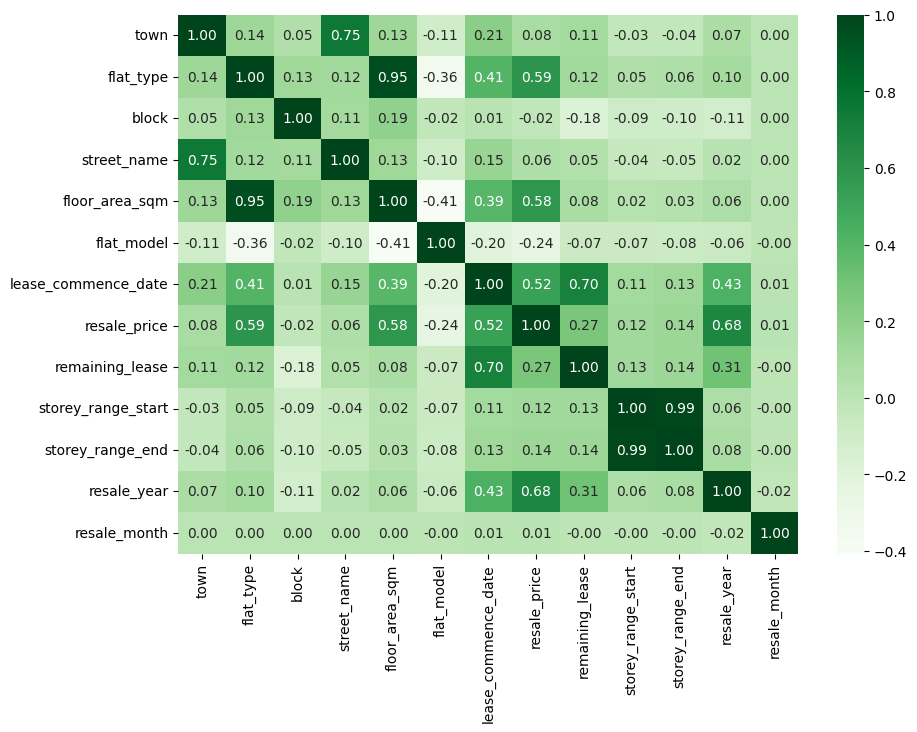

In [40]:
corelation_dataframe = data_frame.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corelation_dataframe,annot=True,cmap="Greens",fmt=".2f")

In [41]:
data_frame.duplicated().sum()

data_frame.drop_duplicates(inplace=True)

In [42]:
data_frame.duplicated().sum()

0

In [44]:
data_frame.drop("remaining_lease",axis =1,inplace=True)

In [45]:
data_frame.shape

(920353, 12)

In [46]:
#saving the completely preprocessed final dataframe 

file_path ="/Users/velmurugan/Desktop/velu/python_works/singapore_flat_price_prediction/final_flat.csv"

if not os.path.exists(file_path):
    data_frame.to_csv(file_path,index=False)
    print("File saved successfully...!")
else:
    print("File exist, skipped saving")

File saved successfully...!


In [48]:
#now its time to build the model 

def regg_model(df,model,label_column):
    x = df.drop(label_column,axis=1)
    y = df[label_column]

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=3)

    algo = model().fit(x_train,y_train)
    y_train_pred = algo.predict(x_train)
    y_test_pred = algo.predict(x_test)

    #train data metrics

    train_data_mse = mean_squared_error(y_train,y_train_pred)
    train_data_rmse = np.sqrt(train_data_mse)
    train_data_mae = mean_absolute_error(y_train,y_train_pred)
    train_data_r2 =r2_score(y_train,y_train_pred)

    #test data metrics

    test_data_mse = mean_squared_error(y_test,y_test_pred)
    test_data_rmse = np.sqrt(test_data_mse)
    test_data_mae = mean_absolute_error(y_test,y_test_pred)
    test_data_r2 =r2_score(y_test,y_test_pred)

    train_data_metrics = {"model":model.__name__,
                          "Data":"Training Data",
                          "MSE":train_data_mse,
                          "RMSE":train_data_rmse,
                          "MAE":train_data_mae,
                          "R2_Score":train_data_r2}
    
    test_data_metrics ={"model":model.__name__,
                          "Data":"Testing Data",
                          "MSE":test_data_mse,
                          "RMSE":test_data_rmse,
                          "MAE":test_data_mae,
                          "R2_Score":test_data_r2}
    
    return train_data_metrics,test_data_metrics
    

In [49]:
print(regg_model(df=data_frame,model=LinearRegression,label_column="resale_price"))
print("\n")
print(regg_model(df=data_frame,model=DecisionTreeRegressor,label_column="resale_price"))
print("\n")
print(regg_model(df=data_frame,model=RandomForestRegressor,label_column="resale_price"))



({'model': 'LinearRegression', 'Data': 'Training Data', 'MSE': 0.08833191509666459, 'RMSE': 0.29720685573631134, 'MAE': 0.22264171823444526, 'R2_Score': 0.7623427581736827}, {'model': 'LinearRegression', 'Data': 'Testing Data', 'MSE': 0.08895576883322273, 'RMSE': 0.2982545369868206, 'MAE': 0.22336467987373063, 'R2_Score': 0.7632532578330871})


({'model': 'DecisionTreeRegressor', 'Data': 'Training Data', 'MSE': 0.00013014665622604397, 'RMSE': 0.011408183739142878, 'MAE': 0.0020234144716365313, 'R2_Score': 0.999649840091005}, {'model': 'DecisionTreeRegressor', 'Data': 'Testing Data', 'MSE': 0.010852193079188712, 'RMSE': 0.10417385986507706, 'MAE': 0.06935064408053308, 'R2_Score': 0.9711179905411069})


({'model': 'RandomForestRegressor', 'Data': 'Training Data', 'MSE': 0.000917515863627235, 'RMSE': 0.030290524320771256, 'MAE': 0.020141284484638654, 'R2_Score': 0.9975314212395042}, {'model': 'RandomForestRegressor', 'Data': 'Testing Data', 'MSE': 0.006099022294479583, 'RMSE': 0.078096237

In [50]:
# our Random forest modelworks well and good so we go with that

X = data_frame.drop("resale_price",axis=1)
y = data_frame.resale_price

#split train and testing data
X_trian,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.15,
                                                 random_state=3)
#fit the model on training data
random_forest_model = RandomForestRegressor()
flat_regg_model = random_forest_model.fit(X_trian,y_train)



In [ ]:
data_frame.iloc[10123]

town                      0.000000
flat_type                 2.000000
block                   445.000000
street_name              14.000000
floor_area_sqm           67.000000
flat_model               12.000000
lease_commence_date    1979.000000
resale_price             11.022063
remaining_lease          68.000000
storey_range_start        1.945910
storey_range_end          2.197225
resale_year            1990.000000
resale_month             11.000000
Name: 10436, dtype: float64

In [ ]:
np.exp(label_1100)

170000.0

In [ ]:
feed = X_test.iloc[2000]
feed =[feed]
label_1100 =y_test.iloc[2000]
feed

[town                      9.000000
 flat_type                 3.000000
 block                   707.000000
 street_name             152.000000
 floor_area_sqm           91.000000
 flat_model               12.000000
 lease_commence_date    1980.000000
 remaining_lease          62.000000
 storey_range_start        1.945910
 storey_range_end          2.197225
 resale_year            2016.000000
 resale_month             12.000000
 Name: 36247, dtype: float64]

448000.0000000002

In [ ]:
pred = flat_regg_model.predict([[0.00000000e+00, 0.00000000e+00, 3.09000000e+02, 1.30000000e+01,
  3.10000000e+01, 5.00000000e+00, 1.97700000e+03, 6.80000000e+01,
  2.30258509e+00, 2.48490665e+00, 1.99000000e+03, 1.00000000e+00]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
pred

array([11.02206297])

In [ ]:
np.exp(pred)

array([61209.82353507])

In [51]:
#saving the model

model_file_path ="/Users/velmurugan/Desktop/velu/python_works/singapore_flat_price_prediction/random_forest_model.pkl"

with open(model_file_path,'wb') as f:
    pickle.dump(flat_regg_model,f)

In [ ]:
np.log(12)

2.4849066497880004